# 0. Import Modules and Setup Global Variables

In [9]:
from METR4911_package import *
import cv2, os
import numpy as np
import math as m
%matplotlib inline

# 1. Detect Static Image

---------------------- FINGER CLASS --------------------
SIDE: [0.0, 'Person', 0.9088997, 4, 135, 251, 312, (3, 115, 62, 135, 6, 131)]
TOP: None

-------------------- FRUIT/VEGETABLES ------------------
SIDE: [0.0, 'Banana', 0.9752493, 307, 95, 599, 238, (306, 75, 370, 95, 309, 91)]
TOP: None

FRUIT/VEGETABLE STATS
-------------------------------------------------
Banana area (cm2): 42.6814404432133
Banana volume (cm3): 241.1990714683697
Banana mass (grams): 151.9554150250729
Banana calories (kcal): 135.2403193723149
-------------------------------------------------

Number of pixels in 1cm line: 19


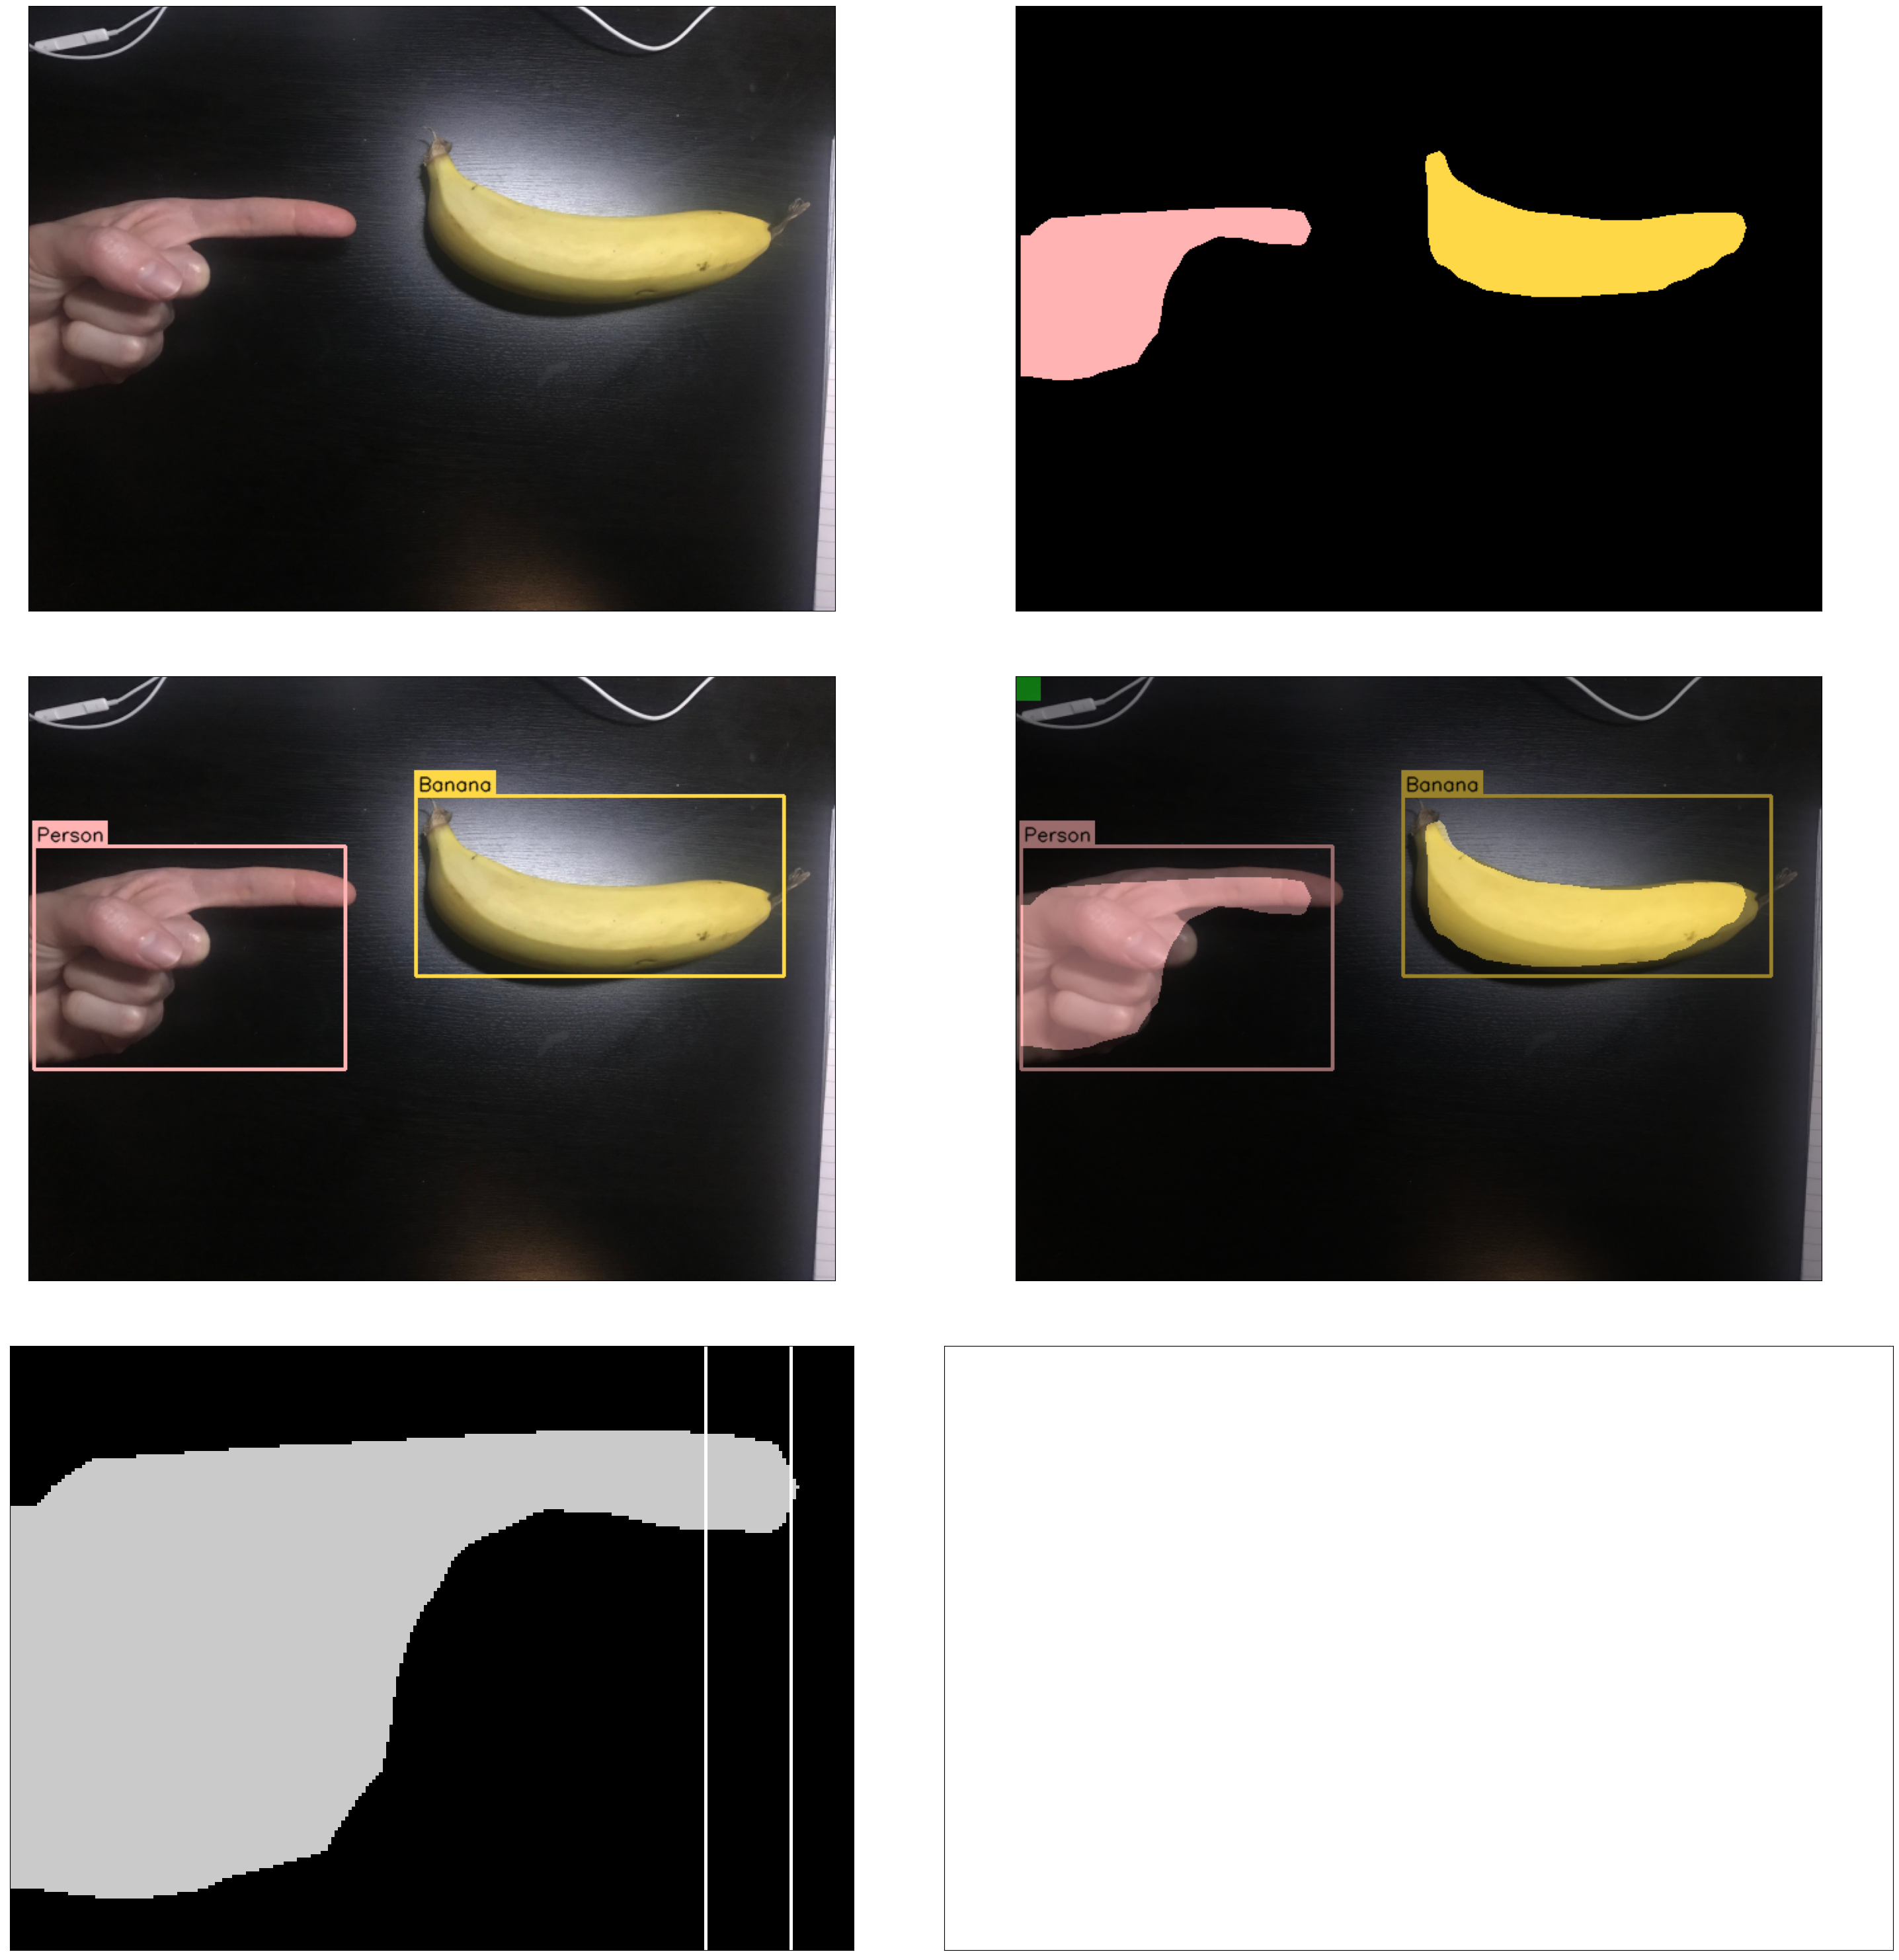

In [10]:
img_file = "banana8_166grams_ver6.jpg"
img_path = os.path.join("WebCam_images", "banana_test", img_file)

# object_detect_img(img_path)
demo_objects, demo_finger, demo_original_img, demo_segmentation_img, demo_object_detect_img = object_detect_img(img_path)

# 3. Show individual fruit/vegetable grey colour

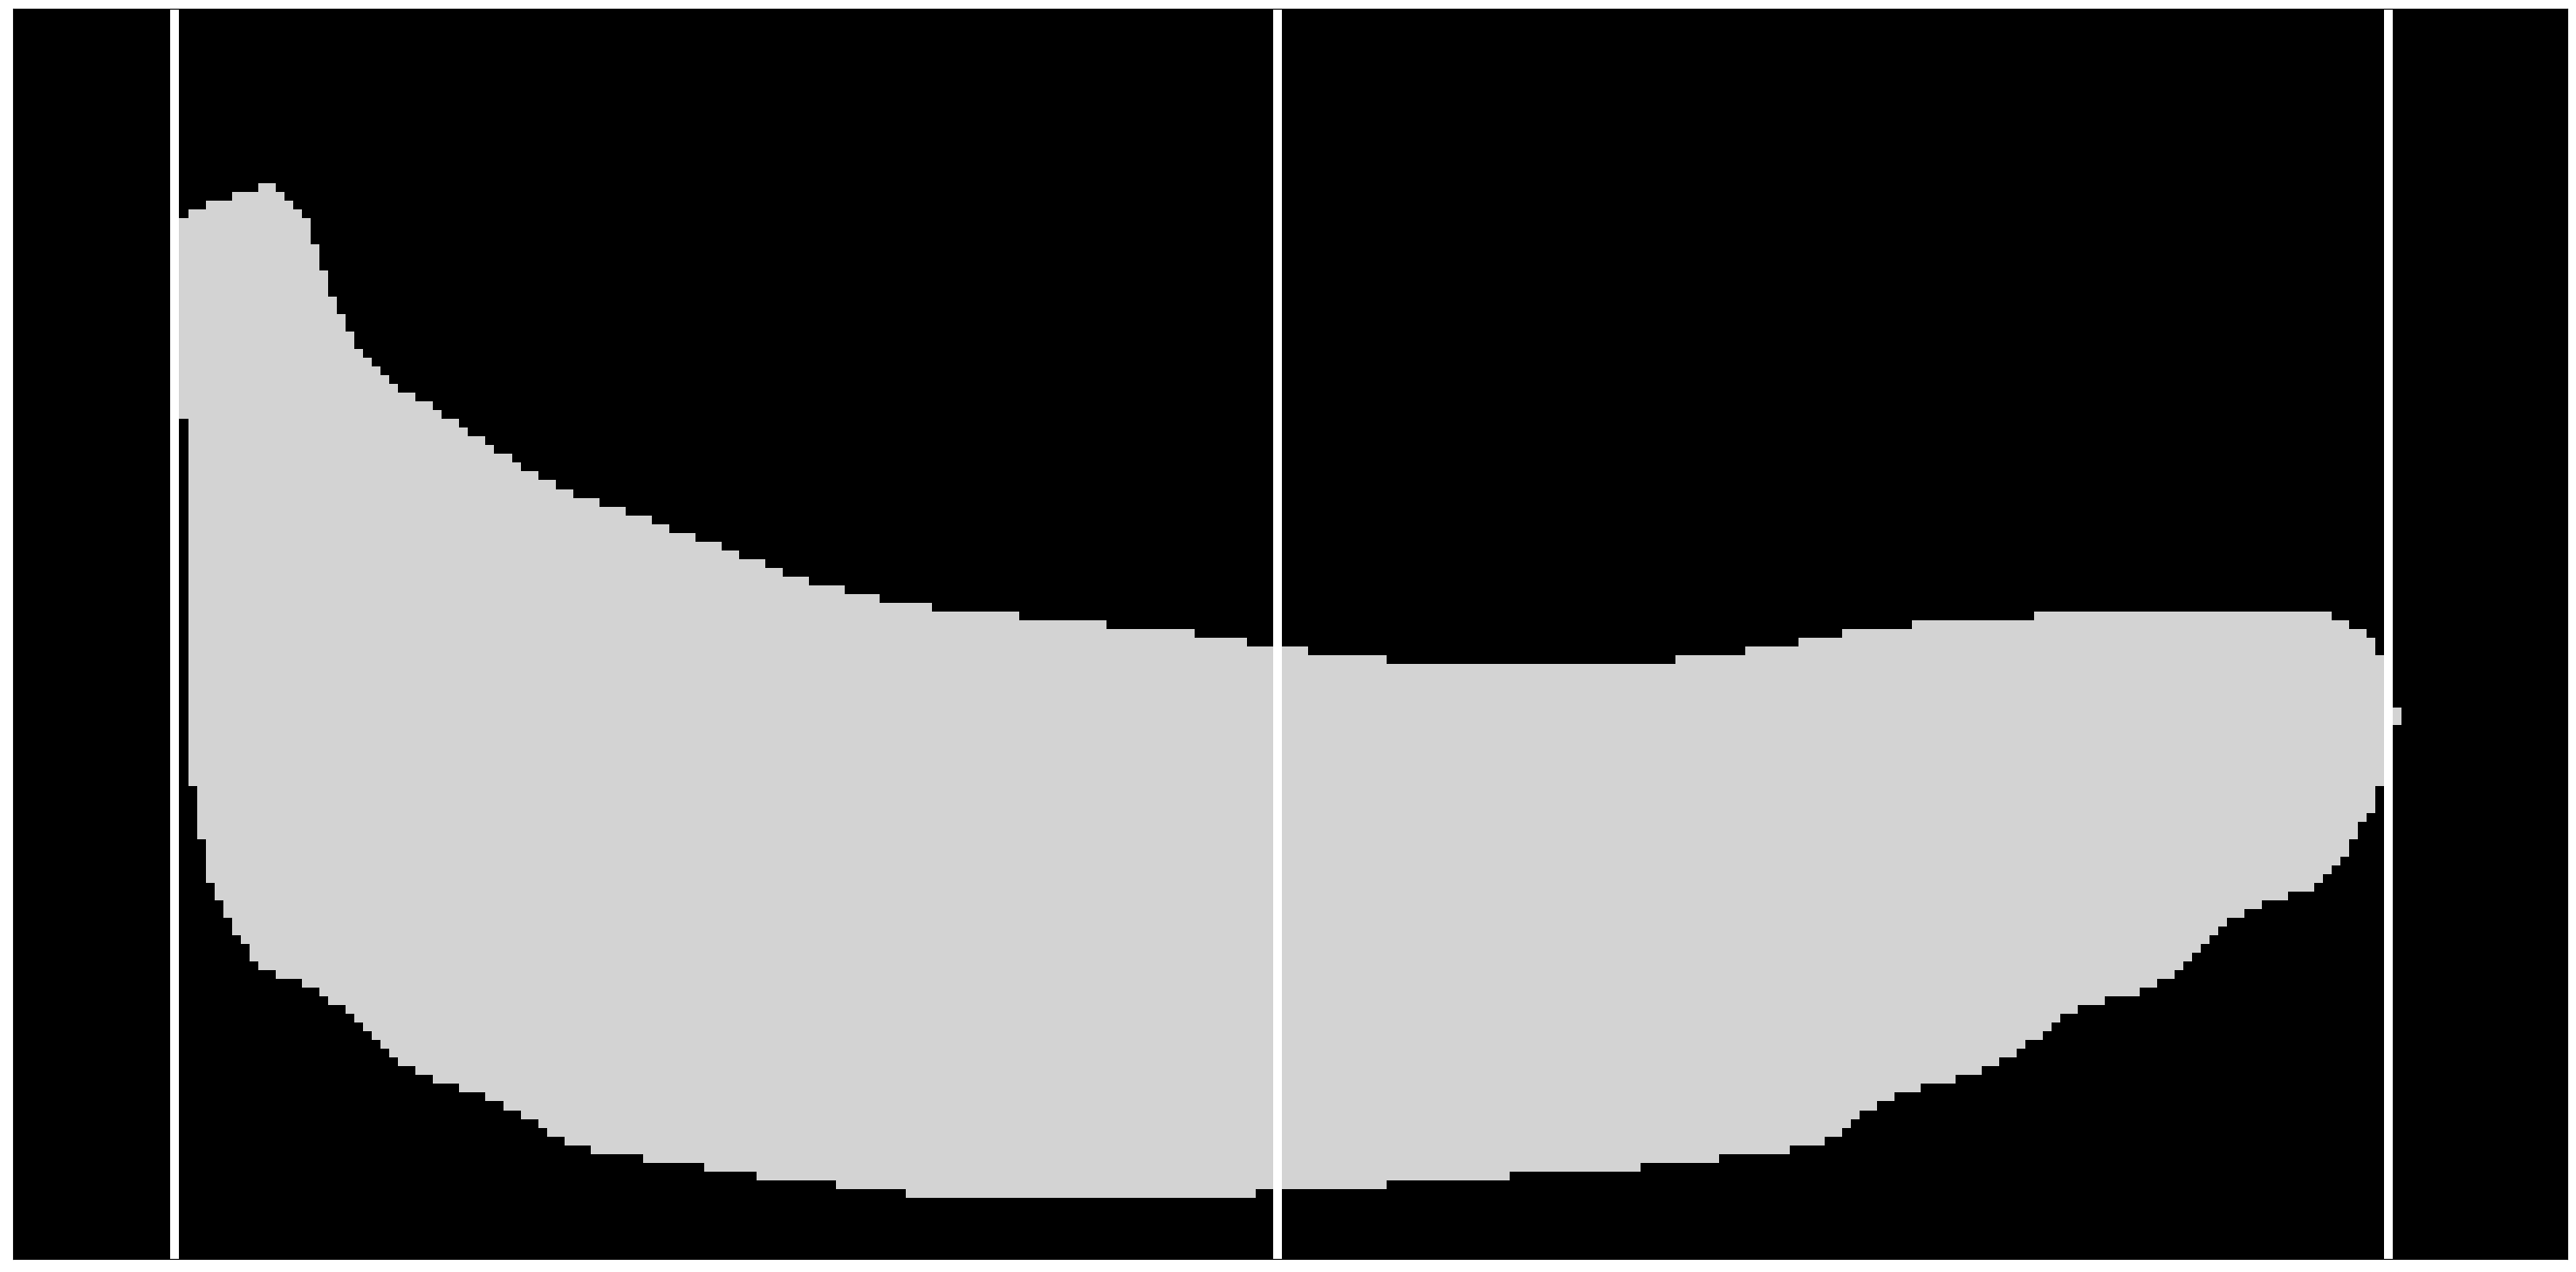

In [11]:
#TODO: Add function to show the finger debugging line process and the banana one as well, just the grey images
num_objects = len(demo_objects)

if num_objects == 1:
    fig, axe  = plt.subplots(num_objects, 1, figsize=(30, 30))
    fig.tight_layout(h_pad=5)
    axe.xaxis.set_visible(False)
    axe.yaxis.set_visible(False)
    if demo_objects[0].get_name() == "Banana":
        axe.imshow(cv2.cvtColor(demo_objects[0].finger_3_lines, cv2.COLOR_BGR2RGB))
    else:
        axe.imshow(cv2.cvtColor(demo_objects[0].object_itself_grey, cv2.COLOR_BGR2RGB))

elif num_objects == 2:
    fig, axe  = plt.subplots(1, 2, figsize=(30, 30))
    fig.tight_layout(h_pad=5)
    axe[0].xaxis.set_visible(False)
    axe[0].xaxis.set_visible(False)
    axe[1].yaxis.set_visible(False)
    axe[1].yaxis.set_visible(False)
    
    if demo_objects[0].get_name() == "Banana":
        axe[0].imshow(cv2.cvtColor(demo_objects[0].finger_3_lines, cv2.COLOR_BGR2RGB))
    else:
        axe[0].imshow(cv2.cvtColor(demo_objects[0].object_itself_grey, cv2.COLOR_BGR2RGB))
        
    if demo_objects[1].get_name() == "Banana":
        axe[1].imshow(cv2.cvtColor(demo_objects[1].finger_3_lines, cv2.COLOR_BGR2RGB))
    else:
        axe[1].imshow(cv2.cvtColor(demo_objects[1].object_itself_grey, cv2.COLOR_BGR2RGB))
    
else:
    index = m.ceil(num_objects/2)
    # print("Index:",index)
    fig, axe  = plt.subplots(index, 2, figsize=(30, 30))
    fig.tight_layout(h_pad=5,w_pad=5)
    
    # Set axes off
    for i in range(index):
        axe[i,0].xaxis.set_visible(False)
        axe[i,0].yaxis.set_visible(False)
        axe[i,1].xaxis.set_visible(False)
        axe[i,1].yaxis.set_visible(False)
    
    # Plot objects in each subplot
    for num in range(num_objects):
        if demo_objects[num].get_name() == "Banana":
            axe[num//2,num%2].imshow(cv2.cvtColor(demo_objects[num].finger_3_lines, cv2.COLOR_BGR2RGB))
        else:
            axe[num//2,num%2].imshow(cv2.cvtColor(demo_objects[num].object_itself_grey, cv2.COLOR_BGR2RGB))
        # # print(num//2,num%2)

[0.0, 'Banana', 0.9752493, 307, 95, 599, 238, (306, 75, 370, 95, 309, 91)]


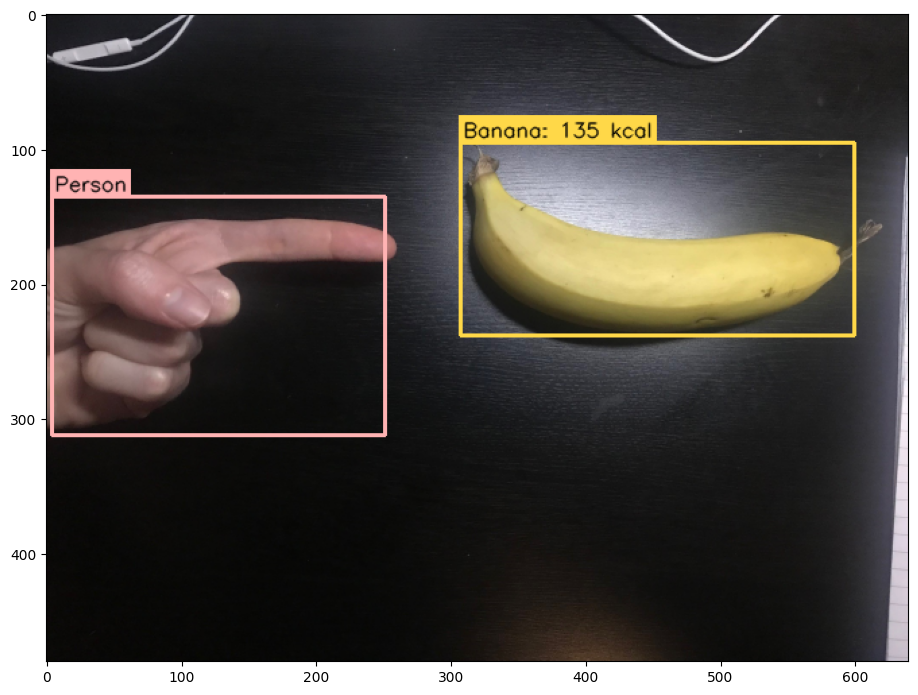

In [12]:
# Draw new label overtop existing with name + calorie
full_object_detect_calorie = demo_object_detect_img.copy()
# plt.imshow(cv2.cvtColor(full_object_detect_calorie, cv2.COLOR_BGR2RGB))  # Inline show image in notebook

# Draw Box
# cv2.rectangle(img, (label_x,label_y), (label_x2,label_y2), color, cv2.FILLED)

# # Draw Text
font = cv2.FONT_HERSHEY_SIMPLEX


for item in demo_objects:
    print(item.box)
    label = f'{item.get_name()}: {round(item.get_calorie())} kcal' 
    
    textSize = cv2.getTextSize(label, fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=0.5, thickness=1)
    
    label_right_padding = textSize[0][0] + 5

    cv2.rectangle(full_object_detect_calorie, (item.box[7][:2]), (item.box[7][0]+label_right_padding, item.box[7][3]), COLORS[item.get_name()], cv2.FILLED)
    cv2.putText(full_object_detect_calorie, label, (item.box[7][4:]), font, 0.5, (0,0,0), 1, cv2.LINE_AA)

plt.imshow(cv2.cvtColor(full_object_detect_calorie, cv2.COLOR_BGR2RGB))  # Inline show image in notebook
